In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
def substring_before_bracket(str):
    return str.split("(")[0]

In [45]:
colours_map = { 'FixedThreshold' : "blue",
                 'IndicatorBased' : "purple",
                 'NullDecisionNode' : "ignore",
                 'RandomDecisionNode' : "ignore",
                 'SimAnnealingMulti' : "green",
                 'SimAnnealingSingle' : "yellow",
                 'default' : "black" 
                }

In [46]:
def plot_decision_node_results(filename, plot_type="front_proportion"):
    df = pd.read_csv(filename)
    df["tests_performed_ratio"] = df["tests_chosen_count"] / df["all_tests_count"]
    df["tests_saved_ratio"] = 1 - df["tests_performed_ratio"]
    
    df["front_proportion"] = df["front_from_decision_node_size"] / df["front_all_tests_size"]
    
    # Need to classify them by the type - before the bracket
    df["decision_node_type"] = df["decision_node"].map(substring_before_bracket)

    all_decision_node_types = sorted(set(df["decision_node_type"]))
    for dn_type in all_decision_node_types: 
        subset = df[df['decision_node_type'] == dn_type]
        if dn_type in colours_map:
            col = colours_map[dn_type]
        else:
            col = colours_map["default"]
        if col != "ignore":
            if plot_type == "proportion_tests_included":
                plt.scatter(subset["tests_performed_ratio"], subset["proportion_of_ref_tests_included"], c=col, label=dn_type)

            elif plot_type == "hypervolume_igd":
                plt.scatter(subset["decision_node_hypervolume"], subset["decision_node_igd"], c=col, label=dn_type)

    if plot_type=="proportion_tests_included":
        plt.xlabel('Proportion of tests performed')
        plt.ylabel('Proportion of tests on front also in reference front')
        plt.title('Front quality for various levels of tests performed')
        plt.legend()
        plt.show()
    elif plot_type=="hypervolume_igd":
        plt.xlabel('Hypervolume')
        plt.ylabel('IGD')
        plt.title('Hypervolume vs IGD')
        plt.legend()
        plt.show()
                

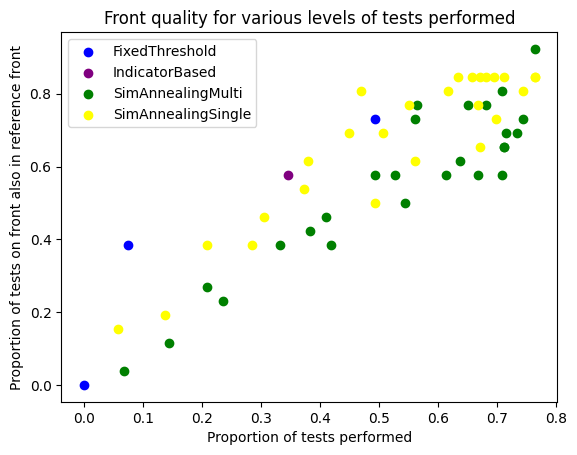

In [47]:
plot_decision_node_results("eterry/eterry-choice1-decisions.csv", plot_type="proportion_tests_included")

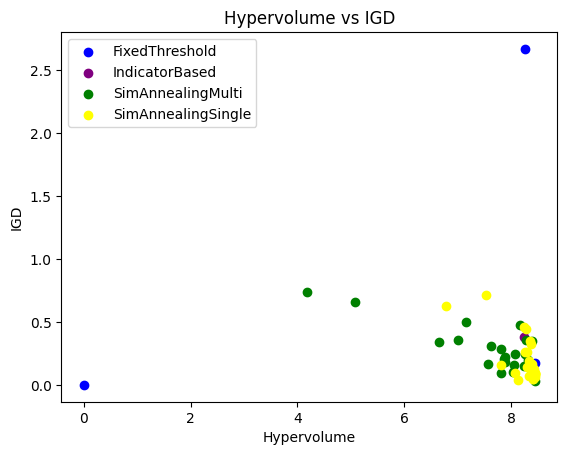

In [48]:
plot_decision_node_results("eterry/eterry-choice1-decisions.csv", plot_type="hypervolume_igd")